In [19]:
#실습과제 1번
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
df_titanic = pd.read_csv("/home/piai/문서/빅데이터분석실습/1 Big Data 분석 기초/titanic.csv",encoding = 'euc-kr')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.shape

(891, 12)

In [5]:
df_titanic.describe() # 기술통계량 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.isnull().sum() # 결측치 확인 결과 객실 번호와 승객이 탑승한 곳에서 결측치가 확인됌

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

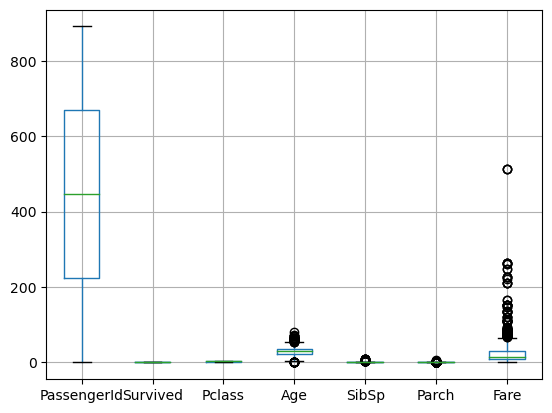

In [7]:
df_titanic.boxplot() # Fare에서 이상치 발견

In [8]:
df_titanic["Cabin"] = df_titanic["Cabin"].str[0]
cabin_counts = df_titanic["Cabin"].value_counts()
print(cabin_counts)  # 최빈값 C

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64


In [9]:
Embarked_counts = df_titanic["Embarked"].value_counts()
print(Embarked_counts) # 최빈값 S

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
#객실번호 첫자리만 별도의 변수로 생성
df_titanic["Cabin_First"]= df_titanic["Cabin"].str.get(i=0)

#나이 그룹에 대한 파생변수 생성
bins = [0, 14, 28, 45, 56, 100]
labels = ["Child", "Young", "Middle", "Prime", "Old"]
df_titanic["Age_Group"] = pd.cut(df_titanic["Age"], bins=bins, labels=labels, right=False)

# 가족수 계산
df_titanic["Family"] = df_titanic["Parch"] + df_titanic["SibSp"]

# 요금 구간화
bins = [0, 51, 101, 151, 201, 1000]
labels = ["0", "1", "2", "3", "4"]
df_titanic["Fare_Group"] = pd.cut(df_titanic["Fare"], bins=bins, labels=labels, right=False)

df_titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_First,Age_Group,Family,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,C,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Middle,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,Young,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,B,Young,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,Middle,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,C,Young,0,0


In [11]:
df_titanic['Cabin_First'].fillna("C", inplace = True)
df_titanic["Cabin"].fillna("C", inplace=True)
df_titanic["Embarked"].fillna("S", inplace=True)
df_titanic.head() #최빈값으로 대체

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_First,Age_Group,Family,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,C,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,C,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,C,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,C,Middle,0,0


In [12]:
df_titanic.isnull().sum() # 결측값 처리 완료

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_First    0
Age_Group      0
Family         0
Fare_Group     0
dtype: int64

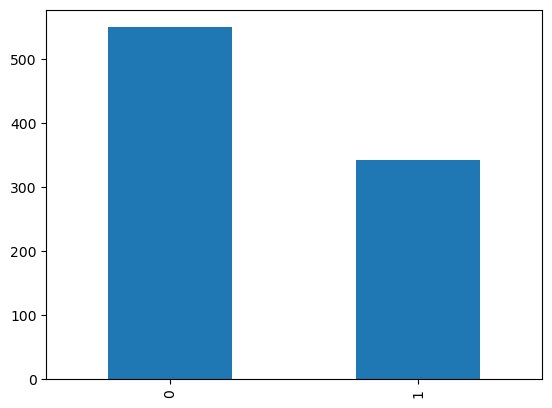

In [25]:
df_titanic_count = df_titanic["Survived"].value_counts()
df_titanic_count.plot.bar()
plt.show()

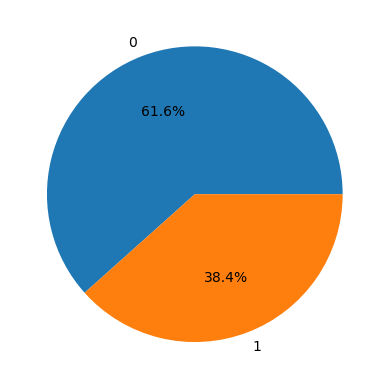

In [23]:
df_titanic_count = df_titanic.groupby(["Survived"]).size()
df_titanic_count.plot.pie(y = "OXY", autopct = "%.1f%%")
plt.show()

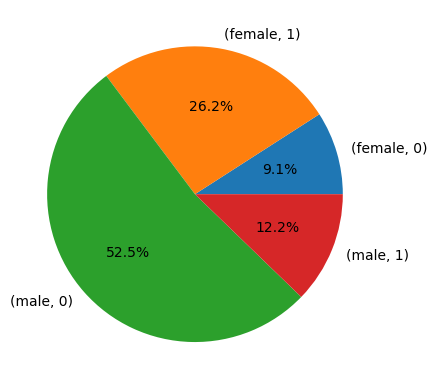

In [29]:
df_titanic_count = df_titanic.groupby(["Sex","Survived"]).size()
df_titanic_count.plot.pie(y = "OXY", autopct = "%.1f%%")
plt.show()

# 예측 : 타이타닉 호 자체가 큰 인명 피해를 입었기에 남녀 불문하고 많은 사상자가 나왔을 것으로 예상
# 성별을 기준으로 생존율을 따져보았을 때 남자 사상자가 52.5%, 여자 사상자가 9.1%로 예상했던 것보다 큰 차이가 나는 비율이었으며 
# 구조보트에 여자들과 아이, 노인을 먼저 태우고 남자들이 제일 먼저 희생하여 구조를 돕고 있었다는 것을 알 수 있었다.

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 225.424848, 235.671432, 245.918016,
        256.1646  , 266.411184, 276.657768, 286.904352, 297.150936,
        307.39752 , 317.644104, 327.890688, 338.137272, 348.383856,
        358.63044 , 368.877024, 379.123608, 389.370192, 399.616776,
        409.86336 , 420.109944, 430.356528, 440.603112, 450.849696,
        461.09628 , 471.342864, 481.589448, 49

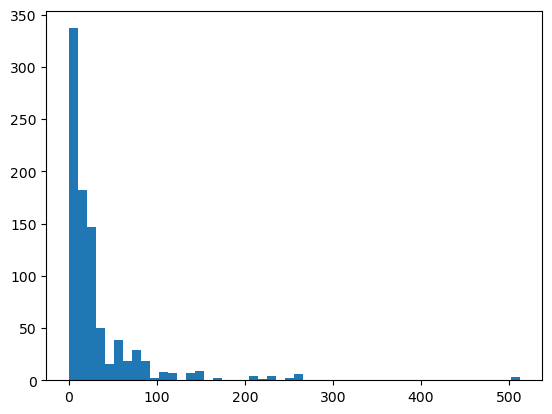

In [35]:
plt.hist(x = "Fare",data = df_titanic, bins = 50 )

In [47]:
# 실습과제 2번
mycars = pd.read_csv("/home/piai/문서/빅데이터분석실습/1 Big Data 분석 기초/mycars.csv")
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [45]:
df_mpg = mycars.groupby('driving')['mpg'].describe()

df_mpg

,count,mean,std,min,25%,50%,75%,max
driving,,,,,,,,
4,103.0,14.330097,2.874459,9.0,13.0,14.0,16.0,21.0
f,106.0,19.971698,3.626510,11.0,18.0,19.0,21.0,35.0
r,25.0,14.080000,2.215852,11.0,12.0,15.0,15.0,18.0


In [48]:
df_highway = mycars.groupby('driving')['highway_mileage'].describe()

df_highway

# 고속도로에서 연비가 시내에서 연비보다 높은 것으로 결과가 나왔다. 고속도로에서 연비가 좋은 이유는 
# 일정한 속도를 주행할 시 연료를 아낄 수 있는 가장 좋은 방법이기 때문이다.

,count,mean,std,min,25%,50%,75%,max
driving,,,,,,,,
4,103.0,19.174757,4.078704,12.0,17.0,18.0,22.0,28.0
f,106.0,28.160377,4.206881,17.0,26.0,28.0,29.0,44.0
r,25.0,21.000000,3.662877,15.0,17.0,21.0,24.0,26.0


In [41]:
# 실습과제 3번
count = df[['driving','model']].value_counts().sort_index()
count

driving  model                 
4        4runner 4wd                6
         a4 quattro                 8
         a6 quattro                 3
         dakota pickup 4wd          9
         durango 4wd                7
         explorer 4wd               6
         f150 pickup 4wd            7
         forester awd               6
         grand cherokee 4wd         8
         impreza awd                8
         k1500 tahoe 4wd            4
         land cruiser wagon 4wd     2
         mountaineer 4wd            4
         pathfinder 4wd             4
         ram 1500 pickup 4wd       10
         range rover                4
         toyota tacoma 4wd          7
f        a4                         7
         altima                     6
         camry                      7
         camry solara               7
         caravan 2wd               11
         civic                      9
         corolla                    5
         grand prix                 5
         gti      

In [42]:
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)

In [43]:
count_data = pd.DataFrame({'Count':count,'Percents':percent,'Cumulative Counts':cumcnt,'Cumulative Percent':cumpct})
count_data.columns.name = 'driving'
count_data

# 4륜 구동과 전륜 구동은 전체 누적 비율로 봤을 때 90%를 이루고 있지만 후륜 구동은 10%남짓채 안되고 있다.
# 후륜 구동은 4륜 구동, 전륜 구동과 비교하여 선호도가 적은 편이다.  

driving                         Count  Percents  Cumulative Counts  \
driving model                                                        
4       4runner 4wd                 6  2.564103                  6   
        a4 quattro                  8  3.418803                 14   
        a6 quattro                  3  1.282051                 17   
        dakota pickup 4wd           9  3.846154                 26   
        durango 4wd                 7  2.991453                 33   
        explorer 4wd                6  2.564103                 39   
        f150 pickup 4wd             7  2.991453                 46   
        forester awd                6  2.564103                 52   
        grand cherokee 4wd          8  3.418803                 60   
        impreza awd                 8  3.418803                 68   
        k1500 tahoe 4wd             4  1.709402                 72   
        land cruiser wagon 4wd      2  0.854701                 74   
        mountaineer 4wd             4  1.709402                 78   
        pathfinder 4wd              4  1.709402                 82   
        ram 1500 pickup 4wd        10  4.273504                 92   
        range rover                 4  1.709402                 96   
        toyota tacoma 4wd           7  2.991453                103   
f       a4                          7  2.991453                110   
        altima                      6  2.564103                116   
        camry                       7  2.991453                123   
        camry solara                7  2.991453                130   
        caravan 2wd                11  4.700855                141   
        civic                       9  3.846154                150   
        corolla                     5  2.136752                155   
        grand prix                  5  2.136752                160   
        gti                         5  2.136752                165   
        jetta                       9  3.846154                174   
        malibu                      5  2.136752                179   
        maxima                      3  1.282051                182   
        new beetle                  6  2.564103                188   
        passat                      7  2.991453                195   
        sonata                      7  2.991453                202   
        tiburon                     7  2.991453                209   
r       c1500 suburban 2wd          5  2.136752                214   
        corvette                    5  2.136752                219   
        expedition 2wd              3  1.282051                222   
        mustang                     9  3.846154                231   
        navigator 2wd               3  1.282051                234   

driving                         Cumulative Percent  
driving model                                       
4       4runner 4wd                       2.564103  
        a4 quattro                        5.982906  
        a6 quattro                        7.264957  
        dakota pickup 4wd                11.111111  
        durango 4wd                      14.102564  
        explorer 4wd                     16.666667  
        f150 pickup 4wd                  19.658120  
        forester awd                     22.222222  
        grand cherokee 4wd               25.641026  
        impreza awd                      29.059829  
        k1500 tahoe 4wd                  30.769231  
        land cruiser wagon 4wd           31.623932  
        mountaineer 4wd                  33.333333  
        pathfinder 4wd                   35.042735  
        ram 1500 pickup 4wd              39.316239  
        range rover                      41.025641  
        toyota tacoma 4wd                44.017094  
f       a4                               47.008547  
        altima                           49.572650  
        camry                            52.564103  
        camry solara             